In [1]:
import pandas as pd
import os
import numpy as np
import pathlib
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
x = []
y = []
path1 = "C://Users//DELL//Downloads//2D geometric shapes dataset//2D geometric shapes dataset//dataset//output"
class_names =['Triangle', 'Square', 'Pentagon', 'Hexagon', 'Heptagon', 'Octagon', 'Nonagon', 'Circle' , 'Star']

for filename in os.listdir(path1):
    img = Image.open(os.path.join(path1,filename))
    img = img.resize((28,28))
    img_array = np.array(img)
    x.append(img_array)
    name = filename.split('_')[0]
    if 'Triangle' == name:
            y.append(0)
    elif 'Square' == name:
            y.append(1)
    elif 'Pentagon' == name:
            y.append(2)
    elif 'Hexagon' == name:
            y.append(3)
    elif 'Heptagon' == name:
            y.append(4)
    elif 'Octagon' == name:
            y.append(5)
    elif 'Nonagon' == name:
            y.append(6)
    elif 'Circle' == name:
            y.append(7)
    elif 'Star' == name:
            y.append(8)

In [3]:
#folder_path_train = 'C:\\Users\\DELL\\Downloads\\kagglecatsanddogs_5340\\PetImages\\training'
#class_names =['Cat', 'Dog']
#x = []
#y = []

#for filename in os.listdir(folder_path_train):
#    for image in os.listdir(f"{folder_path_train}\\{filename}"):
#        if image == '666.jpg' or image == 'desktop.ini' or image == '11702.jpg':
#            continue
#        img = Image.open(f"{folder_path_train}\\{filename}\\{image}")
#        img = img.resize((28,28))
#        img_array = np.array(img)
#        x.append(img_array)
#        if filename == 'Cat':
#               y.append(0)
#        else:
#               y.append(1)
#image = np.array(x)
#label = np.array(y)
#
#could not broadcast input array from shape (28,28,3) into shape (28,28)

In [4]:
X = np.array(x)#.reshape(-1,28,28,1)
Y = np.array(y)
train_image, test_image, train_label,test_label = train_test_split(X, Y)

In [5]:
print("Shape of train images is: ", train_image.shape)
print("Len of train labels is: ", len(train_label))
print(train_label)
print("Shape of test images is: ", test_image.shape)
print("Len of test labels is: ", len(test_label))
print(test_label)

Shape of train images is:  (67500, 28, 28, 3)
Len of train labels is:  67500
[0 4 5 ... 2 2 8]
Shape of test images is:  (22500, 28, 28, 3)
Len of test labels is:  22500
[6 7 1 ... 4 5 1]


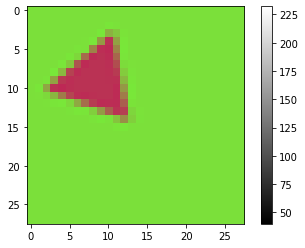

In [6]:
plt.figure()
plt.imshow(train_image[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_image = train_image / 255.0
test_image = test_image / 255.0

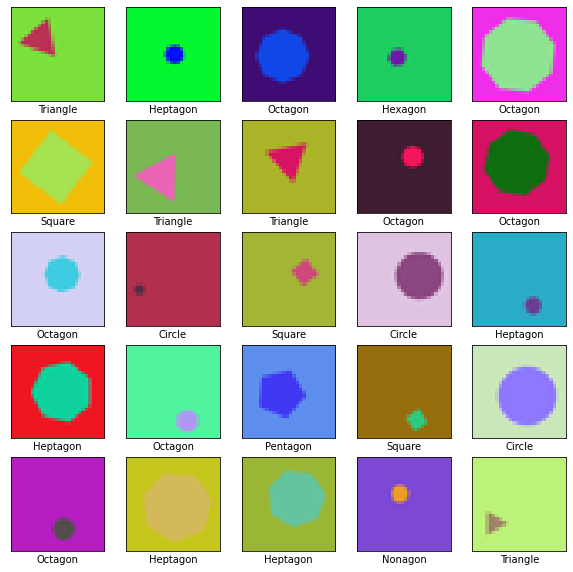

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i])
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [9]:
#model = keras.Sequential([
#    keras.layers.Flatten(),
#    keras.layers.Dense(512,activation=tf.nn.relu),
#    keras.layers.Dense(512,activation=tf.nn.relu),
#     keras.layers.Dense(512,activation=tf.nn.relu),
#    keras.layers.Dropout(0.4),
#    keras.layers.Dense(9, activation=tf.nn.softmax)
#])

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=train_image.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(9, activation='sigmoid'),
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_image, train_label, epochs=15)

Train on 67500 samples
Epoch 1/15
67500/67500 [==============================] - 125s 2ms/sample - loss: 1.9262 - accuracy: 0.2407
Epoch 2/15
67500/67500 [==============================] - 119s 2ms/sample - loss: 1.4849 - accuracy: 0.4103
Epoch 3/15
67500/67500 [==============================] - 120s 2ms/sample - loss: 1.1482 - accuracy: 0.5573
Epoch 4/15
67500/67500 [==============================] - 124s 2ms/sample - loss: 0.9768 - accuracy: 0.6299
Epoch 5/15
67500/67500 [==============================] - 119s 2ms/sample - loss: 0.8663 - accuracy: 0.6763
Epoch 6/15
67500/67500 [==============================] - 121s 2ms/sample - loss: 0.7744 - accuracy: 0.7138
Epoch 7/15
67500/67500 [==============================] - 115s 2ms/sample - loss: 0.6993 - accuracy: 0.7406
Epoch 8/15
67500/67500 [==============================] - 108s 2ms/sample - loss: 0.6420 - accuracy: 0.7617
Epoch 9/15
67500/67500 [==============================] - 108s 2ms/sample - loss: 0.5892 - accuracy: 0.7782
Epoch

In [13]:
model.fit(test_image,test_label)

Train on 22500 samples
22500/22500 [==============================] - 35s 2ms/sample - loss: 0.5142 - accuracy: 0.8008


In [14]:
predictions = model.predict(test_image)
index = 0
print(predictions[index])
print(class_names[np.argmax(predictions[index])])
print(class_names[test_label[index]])

[9.0663968e-07 1.8055421e-04 3.0690045e-04 2.3510221e-04 1.5333765e-04
 2.0535436e-04 1.6117761e-04 1.1200893e-04 4.7045964e-04]
Star
Nonagon


In [15]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array, true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color = color)

In [16]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array, true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10),predictions_array,color="#7777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


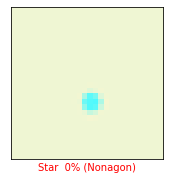

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_label,test_image)
plt.subplot(1,2,1)
#plot_value_array(i,predictions,test_label)
plt.show()

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


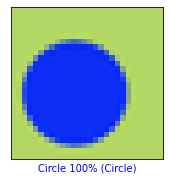

In [18]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_label,test_image)
plt.subplot(1,2,1)
#plot_value_array(i,predictions,test_label)
plt.show()

In [19]:
#model.save('2.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 2.model\assets
